In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [106]:
m=pd.read_csv('masse_cumulative.csv')
T=pd.read_csv('periodi.csv')
x_=pd.read_csv('elongazione.csv')

T^2 vs m

In [107]:
T_m=T.mean()/5
T_s=T.std()/(5*np.sqrt(5))
m_m=m.mean()/1.081605
m_s=m.std()
x_m=x_.mean()
x_s=x_.std()

In [108]:
T_qm=pow(T_m,2)
T_qs=2*T_m*T_s

Text(0, 0.5, 'periodo^2 in s^2')

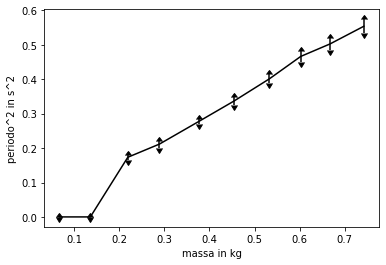

In [109]:
plt.errorbar(m_m,T_qm,T_qs,color='black',uplims=True, lolims=True)
plt.xlabel('massa in kg')
plt.ylabel('periodo^2 in s^2')

Text(0, 0.5, 'periodo^2 in s^2')

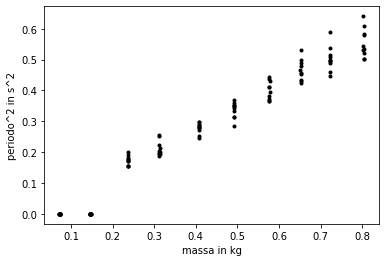

In [110]:
plt.plot(m,pow(T/5,2),'.',color='black')
plt.xlabel('massa in kg')
plt.ylabel('periodo^2 in s^2')

Text(0.5, 0, 'massa in kg')

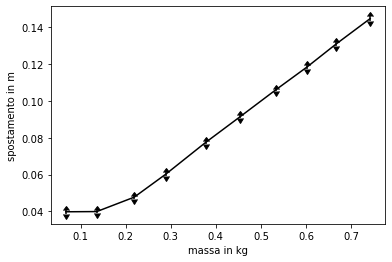

In [111]:
plt.errorbar(m_m,x_m,x_s,color='black',uplims=True, lolims=True)
plt.ylabel('spostamento in m')
plt.xlabel('massa in kg')

Text(0.5, 0, 'massa in kg')

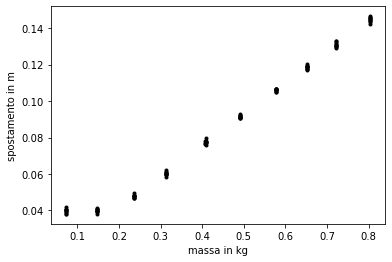

In [112]:
plt.plot(m,x_,'.',color='black')
plt.ylabel('spostamento in m')
plt.xlabel('massa in kg')

Text(0, 0.5, 'periodo^2 in s^2')

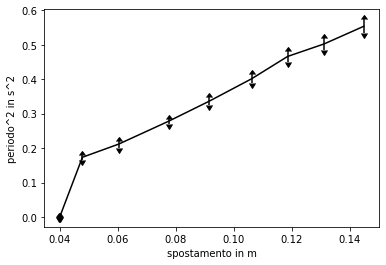

In [113]:
plt.errorbar(x_m,T_qm,T_qs,color='black',uplims=True, lolims=True,xuplims=True, xlolims=True)
plt.xlabel('spostamento in m')
plt.ylabel('periodo^2 in s^2')

Text(0, 0.5, 'periodo^2 in s^2')

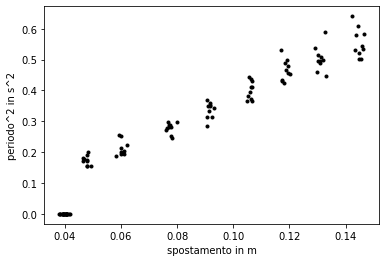

In [114]:
plt.plot(x_,pow(T/5,2),'.',color='black')
plt.xlabel('spostamento in m')
plt.ylabel('periodo^2 in s^2')

retta approssimante

In [115]:
m_m=np.array(m_m)
T_qm=np.array(T_qm)
x_m=np.array(x_m)

In [116]:
T_qm_=T_qm[2:]
m_m_=m_m[2:]
x_m_=x_m[2:]

In [117]:
Tm=T_qm_.mean()
mm=m_m_.mean()
xm=x_m_.mean()

In [118]:
m_m_p=m_m_-mm
T_qm_p=T_qm_-Tm
x_m_p=x_m_-xm

primo grafico

In [119]:
S=np.dot(m_m_p,T_qm_p)
S_d=np.dot(m_m_p,m_m_p)
b=S/S_d
print(b)

0.752249838314284


In [120]:
c=Tm-mm*b
print(c)

0.00022712619030657022


Text(0, 0.5, 'periodo^2 in s^2')

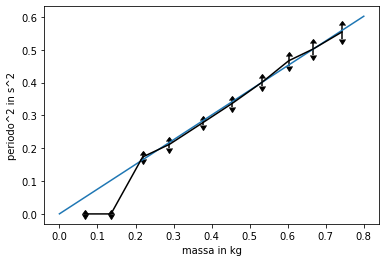

In [121]:
plt.errorbar(m_m,T_qm,T_qs,color='black',uplims=True, lolims=True)
x=np.linspace(0,0.8)
y=b*x+c
plt.plot(x,y)
plt.xlabel('massa in kg')
plt.ylabel('periodo^2 in s^2')

secondo grafico

In [122]:
S=np.dot(m_m_p,x_m_p)
S_d=np.dot(m_m_p,m_m_p)
a=S/S_d
print(a)

0.18543380926545705


In [123]:
d=xm-mm*a
d

0.007145145562135566

Text(0.5, 0, 'massa in kg')

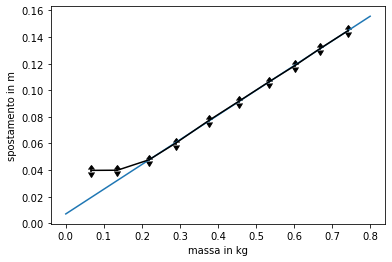

In [124]:
plt.errorbar(m_m,x_m,x_s,color='black',uplims=True, lolims=True)
x=np.linspace(0,0.8)
y=a*x+d
plt.plot(x,y)
plt.ylabel('spostamento in m')
plt.xlabel('massa in kg')

terzo grafico

In [125]:
S=np.dot(x_m_p,T_qm_p)
S_d=np.dot(x_m_p,x_m_p)
f=S/S_d
f

4.055887715320632

In [126]:
g=Tm-xm*f
g

-0.02867940416521486

Text(0, 0.5, 'periodo^2 in s^2')

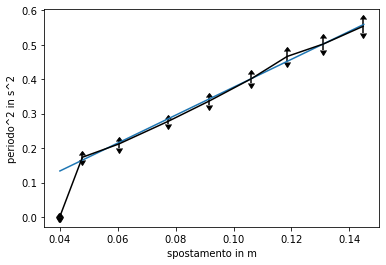

In [127]:
plt.errorbar(x_m,T_qm,T_qs,color='black',uplims=True, lolims=True,xuplims=True, xlolims=True)
x=np.linspace(0.04,0.145)
y=f*x+g
plt.plot(x,y)
plt.xlabel('spostamento in m')
plt.ylabel('periodo^2 in s^2')

calcolo incertezze coefficenti angolari

In [128]:
T_qs_=T_qs[2:]
x_s_=x_s[2:]
b_s=1/(sum(1/T_qs_)*pow(m_m_p.std(),2))
a_s=1/(sum(1/x_s_)*pow(m_m_p.std(),2))
f_s=1/(sum(1/T_qs_)*pow(x_m_p.std(),2))

k dal primo coeff. angolare

In [129]:
T_qs_=T_qs[2:]
k1=4*pow(np.pi,2)/b
k1_s=4*pow(np.pi,2)/pow(b,2)*b_s
print(k1,k1_s)

52.48046007271279 3.3263674997785833


g dal terzo coeff. angolare

In [130]:
T_qs_=T_qs[2:]
g1=4*pow(np.pi,2)/f
g1_s=4*pow(np.pi,2)/pow(f,2)*f_s
print(g1,g1_s)

9.733607134939268 3.3274787438708633


g dal secondo coeff/primo coeff

In [131]:
g2=4*pow(np.pi,2)*a/b
db=1/a
da=b/pow(a,2)
g2_s=4*pow(np.pi,2)*np.sqrt(pow(db*b_s,2)+pow(da*a_s,2))
print(g2,g2_s)

9.731651623286856 10.748222709259668
